# Implementing Simple Linear Regression Model From Scratch 
In this notebook i'm gonna implement simple linear regression model from scratch. I will use a simple data frame that contains only one feature and one label x, y respectively.

In [1]:
#Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the data
df = pd.read_excel('data.xlsx')

In [3]:
#Displaying the first five rows
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [5]:
#Splitting the data for training and testing
x_train = df.iloc[ : 40]['X'].values
y_train = df.iloc[ : 40]['Y'].values
x_test  = df.iloc[40 : ]['X'].values
y_test  = df.iloc[40 : ]['Y'].values 

In [6]:
#Displaying training and testing data
print('X Train: ', x_train)
print('Y Train: ', y_train)
print('X Test: ', x_test)
print('Y Test: ', y_test)

X Train:  [108  19  13 124  40  57  23  14  45  10   5  48  11  23   7   2  24   6
   3  23   6   9   9   3  29   7   4  20   7   4   0  25   6   5  22  11
  61  12   4  16]
Y Train:  [392.5  46.2  15.7 422.2 119.4 170.9  56.9  77.5 214.   65.3  20.9 248.1
  23.5  39.6  48.8   6.6 134.9  50.9   4.4 113.   14.8  48.7  52.1  13.2
 103.9  77.5  11.8  98.1  27.9  38.1   0.   69.2  14.6  40.3 161.5  57.2
 217.6  58.1  12.6  59.6]
X Test:  [13 60 41 37 55 41 11 27  8  3 17 13 13 15  8 29 30 24  9 31 14 53 26]
Y Test:  [ 89.9 202.4 181.3 152.8 162.8  73.4  21.3  92.6  76.1  39.9 142.1  93.
  31.9  32.1  55.6 133.3 194.5 137.9  87.4 209.8  95.5 244.6 187.5]


In [7]:
#Displaying the shape and type of training and testing data
print(f'X Train Shape: {x_train.shape} and Type: {type(x_train)}')
print(f'Y Train Shape: {y_train.shape} and Type: {type(y_train)}')
print(f'X Test Shape: {x_test.shape}  and Type: {type(x_test)}')
print(f'Y Test Shape: {y_test.shape}  and Type: {type(y_test)}')

X Train Shape: (40,) and Type: <class 'numpy.ndarray'>
Y Train Shape: (40,) and Type: <class 'numpy.ndarray'>
X Test Shape: (23,)  and Type: <class 'numpy.ndarray'>
Y Test Shape: (23,)  and Type: <class 'numpy.ndarray'>


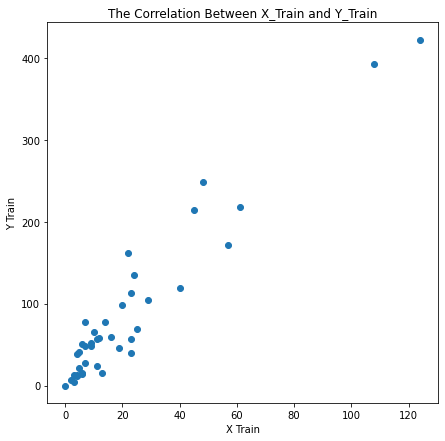

In [8]:
#The correlation between x_train , y_train
plt.figure(figsize = (7,7))
plt.scatter(x_train,y_train)
plt.title('The Correlation Between X_Train and Y_Train')
plt.xlabel('X Train')
plt.ylabel('Y Train')
plt.show()

- From the above scatter plot we can see that the relation between the two axis is linear.

In [9]:
def MEAN(arr):
    '''
    This function for obtaining the mean from an array from scratch.
    INPUT:
    arr: numpy.ndarray. The array.
    OUTPUT:
    The mean of the given array.
    '''
    sum_ = 0
    length = len(arr)
    for idx in range(length):
        sum_ += arr[idx]
    return sum_ / length

In [10]:
def coefficients(x_train,y_train):
    '''
    This function for obtaining the coefficients of the linear equation from scratch.
    INPUT:
    x_train: numpy.ndarray. The training part from x.
    y_train: numpy.ndarray. The training part from y.
    OUTPUT:
    The coefficients of the linear equation.
    '''
    numerator_val = 0
    denominator_val = 0
    x_mean = MEAN(x_train)
    y_mean = MEAN(y_train)
    for idx in range(len(x_train)):
        numerator_val += ((x_train[idx] - x_mean) * (y_train[idx] - y_mean))
        denominator_val += ((x_train[idx] - x_mean) ** 2)
    B1 = numerator_val / denominator_val
    B0 = y_mean - B1 * x_mean
    return B0, B1

In [11]:
def SimpleLinearRegression(x_train,y_train,x_test):
    '''
    This function for getting the coefficients and uses them to return the predicted values.
    INPUT:
    x_train: numpy.ndarray. The training part from x.
    y_train: numpy.ndarray. The training part from y.
    x_test: numpy.ndarray. The testing part from x.
    OUTPUT:
    The predicted values.
    '''
    y_pred = []
    B0, B1 = coefficients(x_train,y_train)
    for idx in range(len(x_test)):
        y_pred.append(B0 + B1 * x_test[idx])
    return y_pred

In [12]:
def MSE(y_pred,y_actual):
    ''''
    This function for calculating the mean squared error.
    INPUT:
    y_pred: list. The predicted values.
    y_actual: numpy.ndarray. The testing part from y.
    OUTPUT:
    Mean squared error value.
    '''
    length = len(y_pred)
    sum_ = 0
    for idx in range(length):
        sum_ += ((y_actual[idx] - y_pred[idx]) ** 2)
    return sum_ / length

In [13]:
def evaluate(x_train,y_train,x_test,y_test):
    '''
    This function for evaluating the model.
    INPUT:
    x_train: numpy.ndarray. The training part from x.
    y_train: numpy.ndarray. The training part from y.
    x_test: numpy.ndarray. The testing part from x.
    y_test: numpy.ndarray. The testing part from y.
    OUTPUT:
    The evaluation results.
    '''
    y_pred = SimpleLinearRegression(x_train,y_train,x_test)
    mse = MSE(y_pred,y_test)
    print(f'The predicted values:\n{y_pred}\n')
    print(f'The Model Evaluation by using MSE = {mse}')
    return y_pred

In [14]:
#Model Evaluation
y_pred = evaluate(x_train,y_train,x_test,y_test)

The predicted values:
[56.282120885902025, 219.3265056235952, 153.41494583601713, 139.53882798600068, 201.98135831107464, 153.41494583601713, 49.344061960893804, 104.84853336095956, 38.93697357338148, 21.591826260860927, 70.15823873591847, 56.282120885902025, 56.282120885902025, 63.220179810910246, 38.93697357338148, 111.78659228596779, 115.2556217484719, 94.44144497344723, 42.40600303588559, 118.724651210976, 59.751150348406135, 195.04329938606645, 101.37950389845545]

The Model Evaluation by using MSE = 2235.9038595957086


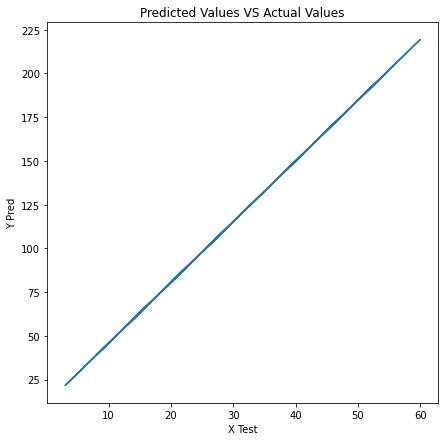

In [15]:
plt.figure(figsize = (7,7))
plt.plot(x_test,y_pred)
plt.title('Predicted Values VS Actual Values')
plt.xlabel('X Test')
plt.ylabel('Y Pred')
plt.show()